In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
%matplotlib inline
import random
import pandas as pd
import pickle

In [2]:
root = '/p300/flickr30k_images/'
train_images_list = os.listdir(root+'flickr30k_images/')
sample_size = 30
train_images_list = train_images_list[:sample_size]

In [3]:
im_id = train_images_list[1]

In [4]:
from PIL import Image
filename = '/p300/flickr30k_images/flickr30k_images/' + im_id

In [5]:
# create Selective Search Segmentation Object using default parameters
cv2.setUseOptimized(True);
cv2.setNumThreads(4);
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
def ss_boxes(img, mode='f', keep_boxes=100):
    # read image
    # set input image on which we will run segmentation
    ss.setBaseImage(img)
 
    # Switch to fast but low recall Selective Search method
    if (mode == 'f'):
        ss.switchToSelectiveSearchFast()
    # Switch to high recall but slow Selective Search method
    elif (mode == 'q'):
        ss.switchToSelectiveSearchQuality()
 
    # run selective search segmentation on input image
    rects = ss.process()[:keep_boxes, :]
#     print('Total Number of Region Proposals: {}'.format(len(rects)))
    rects[:, 2] += rects[:, 0]
    rects[:, 3] += rects[:, 1]
    return rects

In [9]:
im = cv2.imread(filename)
rects = ss_boxes(im, mode='f')

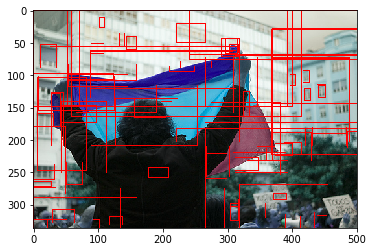

In [10]:
imOut = im.copy()
# itereate over all the region proposals
for i, rect in enumerate(rects):
    x1, y1, x2, y2 = rect
    cv2.rectangle(imOut, (x1, y1), (x2, y2), (255, 0, 0), 1)

plt.imshow(imOut)

In [64]:
img.size

(500, 336)

In [65]:
np.array(img).shape

(336, 500, 3)

In [41]:
sentence_root = '/p300/flickr30k_images/flickr30k_anno/Sentences/'
sentence_list = os.listdir(sentence_root)

In [55]:
count = 0
total = 0
for i,sent_f in enumerate(sentence_list[20000:30000]):
    sent_file = sentence_root + sent_f
    sents = open(sent_file)
    for line in sents:
        total += 1
        if 'people' not in line:
            count += 1
    sents.close()
#             print(line)
#             import ipdb; ipdb.set_trace()
print(total, count)

50000 4374


In [53]:
len(sentence_list)

31783